# Python Basics

*This workshop serves as an introduction to Python and common modules that will be used in later parts of the series.*

   Section A: [Container Data Types](#sectionA)
   
   Section B: [Functions + Libraries](#sectionB)
   
   Section C: [Numpy Arrays](#sectionC)
   
   Section D: [Plotting - Some Simple Data](#sectionD)

***
<a id='sectionA'></a>
## A. Container Data Types

Python has a number of built-in ways to store data:

| Data Type  | Mutable | Construct |    Example    |
|------------|:-------:|:---------:|:-------------:|
| list       |    Y    |   list()  |    [1,2,3]    |
| tuple      |    N    |  tuple()  |    (1,2,3)    |
| range      |    N    |  range()  |   range(1,4)  |
| string     |    N    |   str()   |     '123'     |
| set        |    Y    |   set()   |    {1,2,3}    |
| dictionary |    Y    |   dict()  | {1:'a',2:'b'} |

### Strings and Lists
- The most commonly used containers are strings and lists.
- A STRING stores characters and is enclosed by quotation marks (single quotes OK).
- A LIST is an ordered collection of values.
    - The values *can* be strings and/or (nested) lists.  

In [1]:
# some string stuff
s1 = 'hello'
print(type(s1))
print(s1)

# '+' and '*' can be used to modify strings
s2 = ' world '
s = s1 + s2
print(s)
print(3*s)

print()
# every string has a length
print('The length of s1 is:', len(s1))
print(f'The length of s2 is: {len(s2)}')
print(f'The length of s is: {float(len(s))}')

### To run this cell (and any other cell), push SHIFT + ENTER.

<class 'str'>
hello
hello world 
hello world hello world hello world 

The length of s1 is: 5
The length of s2 is: 7
The length of s is: 12.0


#### A note about python3 and `print`
- Python3 is the 'new' version of python2.  The most obvious difference between the two is how to use the print function.
    - In python2 the print function is called without parenthesis, for example:
        `print 'This how we print in python2.'`
    - Python3 requires more typing but yields a more consistent syntax to python functions:
        `print('This is how we print in python3.')`
    - Adaptation to python3 is slow, so you will see both in existing code, new code, and online help.
- Commas within a print function add space and join two values together.
- The *new* *new* in python3 are f-strings which make it easier (more concise) to print strings with variables inline.  For example: `print(f'The length of s is: {len(s)}')`.
    - The `f` in the above example signals the beginning of an f-string.  The takeaway is the ability to put a variable into the string (enclosed in curly brackets) without much effort or formatting.
    - See cell below for an even *better* example illustrating the control over the format of a variable...

In [2]:
# f-strings!
pi = 3.141592653589793238462643383279
width = 5
precision = 3
n = 2

print(f'The value of pi is: {pi}')
print(f'The value of pi is: {pi:5.3}')
print(f'The value of pi is: {pi:{width}.{precision}}')
print(f'The value of {n}pi is: {n*pi:{width-1}.{precision}}')

The value of pi is: 3.141592653589793
The value of pi is:  3.14
The value of pi is:  3.14
The value of 2pi is: 6.28


In [3]:
# a number of methods exist to manipulate a string, e.g
print(s.upper())
print(s.count('o'))

#notice that s.upper() did not actually change `s` (it is still lower case)
#more on this 'feature' shortly
print(s.islower()) 

# Uncomment the below line (it's long!) to see a directory of all the methods available to the string, `s`.
#dir(s)

HELLO WORLD 
2
True


- Rather than using `dir(some_object)` to see the available methods you can also tab to auto-complete as you type within the Jupyter notebook.  Similar to a UNIX shell, etc.
- In addition, try hitting SHIFT + TAB within an empty parenthesis to get some help on the corresponding method/function.

In [5]:
# lists are typically created with brackets
a = []  #an empty list
print(type(a))
b = [10,11,12]
c = [13,14,15]
print( b + c )  #concat two lists (what does * do?)

# like strings, lots of methods to manipulate lists with
b.append('Hello')
print( b )   #here, a.append('Hello') DID permanently change `a` 
b.insert(2, 11.5)  
print( b )

<class 'list'>
[10, 11, 12, 13, 14, 15]
[10, 11, 12, 'Hello']
[10, 11, 11.5, 12, 'Hello']


#### Slicing
- You can access the `i`th element of a list or string in a similar fashion to each other (`some_list[i]`, `some_string[i]`).
- This notation is actually extendable to where you want to start, end, and step-size...
    - `some_list[lower:upper:stride]`

In [6]:
# slicing
a = [10,11,12,13,14,15]
s = 'Hello World'

# default of 'stride' is 1.
print(a[1:3]) #notice where python starts counting (0) and which index it prints up to (3 minus 1)
print(a[::2]) #note leaving 'lower' ('upper') blank means 'start at the beginning' ('go until the end')

# start at the last element and use a negative stride to print backwards
print( s[-1::-1] ) 

# one could also convert a string into a list...
b = list(s)
print( b )

[11, 12]
[10, 12, 14]
dlroW olleH
['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd']


#### Mutable vs Immutable
- Mutable objects can be changed in place, immutable cannot.
- String are immutable, lists are mutable.
    - Remember `s.upper()` did not change the string (permanently) but `a.append()` did change the list.
- Is this important?
    - If a data type is immutable then you should know that changing it does not have an effect.
    - Immutables are typically faster and smaller if you're trying to optimize code.
    - Immutables are also safer to code with and can make debugging easier.

In [7]:
a = [10,11,12,13,14,15]
a[1:3] = [111,112]
print(a)

s = 'abcdef'
#s[1:3] = 'xy'  #this line gives a typeError, why?  Comment out to proceed...

# there are ways around immutability though
# `redefine` instead of `change`
s = s[:1] + 'xy' + s[3:]
print(s)

[10, 111, 112, 13, 14, 15]
axydef


#### Exercise A.1:

In [8]:
"""Consider the below string of text that contains the 
    results of a vote: yes, no, y, or n.  Determine (and print) the
    percentage of votes the are yes (y) and no (n).
    """

votes = 'Yes n N y No yes Yes N y y Y no yes no N Yes N Y y No yes'

# write solution below
votes = votes.lower()  #lets not worry about capitalization

yes = votes.count('y')  #each yes vote contains a y
no = votes.count('n')   #each no vote contains a n

print(f'The % of yes votes is: {yes/(yes+no)*100:5.3}')
print(f'The % of no votes is:  {no/(yes+no)*100:5.3}')

The % of yes votes is:  57.1
The % of no votes is:   42.9


#### Exercise A.2:

In [9]:
"""Determine the total number of palindrome numbers from 10 to 10000.
    A palindrome is such that it is the same number when read backwards.
    The first from 10 on for example is 11."""

# HINT: use the range function to iterate from 10 to 10000.
# write solution below

n = 0 #start a counter
for i in range(10, 10001):
    if str(i) == str(i)[-1::-1]:
        n += 1  #increment counter if i is palindrome
        
print(n)

189


## Tuples, Sets and Dictionaries
- Tuples are effectively immutable lists.
- Generally are constructed with `()` instead `[]`. 
- In practice however, tuples can be constructed without a delimiter.

- Sets are a collection of *unique* objects.
- They are similar to a set in math and have similar methods (union, intersection, etc).
- Can be constructed with curly braces.  

- Dictionaries are mapping objects which store key/value pairs.
- Each key corresponds to a value:
    - `some_dict = {key1:value1, key2:value2, key3:value3}`

In [10]:
# tuples stuff
a = (10,11,12,13,14,15)
print(a)
a = 10,11,12,13,14,15 
print(a)

print()
# set stuff
b = {1,2,3,4,5,5}
c = {3,4,5,6}
print(b) # notice removal of duplicate element
print(b.union(c))
print(b.intersection(c))

print()
# dictionaries!
d = {'mass':12.7, 'speed': 5.0, 'age':5}
print(d.keys())
print(d.values())
print(f'The mass of d is: {d["mass"]}')  # note that is necessary to use double quotes here

(10, 11, 12, 13, 14, 15)
(10, 11, 12, 13, 14, 15)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6}
{3, 4, 5}

dict_keys(['mass', 'speed', 'age'])
dict_values([12.7, 5.0, 5])
The mass of d is: 12.7


#### Exercise A.3:

In [11]:
"""Consider two lists of possibly unequal length.
    Create a third list that contains only unique elements
    common between the two lists.
    
    Do this two ways: without using sets and using sets.
    """

a = [0, 1, 5, 7, 9, 11, 0, 16, 18, 19, 5, 33]
b = [4, 2, 25, 21, 18, 17, 15, 3, 7, 18, 1, 5]

# write your solution(s) below
# without using sets
c = []  # create an empty list
for i in a:    #iterate through the first list
    if i in b:  #if the element is also in b
        if i not in c:  #make sure c is a unique list
            c.append(i)   #put it in the new list
print(c)


# write your solution below
# using sets
a_set = set(a)  #convert to set
b_set = set(b)
print(a_set.intersection(b_set))  #get the intersection

[1, 5, 7, 18]
{1, 18, 5, 7}


### List Comprehensions

List comprehension is a more concise way to create lists.  At first glance it appears a lot is going on but it makes your code much simpler and easier to read in the long run.

In [12]:
# consider this example without list comprehension
a = [3, 'd', 4, 3.5, 'e', 5]

# suppose we wanted a list that consisted of the squares of a for every element that is an integer
b = []
for element in a:
    if type(element) == int:
        b.append(element**2)
        
b

[9, 16, 25]

In [13]:
# now with list comprehension
[element**2 for element in a if type(element) == int]

[9, 16, 25]

List comprehensions are often times (marginally) faster than a normal for loop as well. 

In general, the construct looks like:
`[output expression FOR an iterator IF boolean statement]`.

#### Exercise A.4

In [ ]:
"""Consider the below nested list
   Write a single list comprehension that does the same.
   """
a = [ [1,2,3], [4,5,6], [7,8] ]

# flatten the list
# and keep only rows with 3 or more
aFlat = []
for x in a:
    if len(x) > 2:
        for y in x:
            aFlat.append(y)
            
# write single list comprehension below
[y for x in a if len(x) > 2 for y in x]

***
<a id='sectionB'></a>
## B. Functions + Libraries

Functions are handy constructs to allow you to easily reproduce a procedure without retyping or (copy and pasting) a block of code over and over again.  The most basic syntax is fairly straight forward.

In [14]:
# a simple function
def add(x,y):
    a = x + y
    return a

print(add(4,10))

# you can also include optional arguments w/ defaults
def quadratic(x, a=1, b=1, c=0):
    y = a*x**2 + b*x + c
    return y

print(quadratic(2))  # using default arguments
print(quadratic(2,b=2,c=1)) # changing some of the defaults

14
6
9


In [15]:
# you can also pass an arbitrary # of 
# parameters to a function
def printMe(x, y, *args):   
    print(x, y, args)
    
# the * tells you it is magic variable
# this means it has an arbitrary number of arguments (user definedj)
printMe(5, 'test', 6, 'hello world')

5 test (6, 'hello world')


### Doc Strings
To help other users understand your code - including you later, it is common and courteous to include a doc string.  A doc string is convenient way to allow a user (possibly you) to get a quick description of the function.

Doc strings are written on the first line of the function (below the `def` statement) and are conventionally enclosed in **triple double quotes**.  See [here](https://www.python.org/dev/peps/pep-0257/) for the python convention(s).

In [16]:
# doc string
def cubic(x,a=1,b=1,c=1,d=0):
    """Returns the result of a cubic polynomial"""
    
    y = a*x**3 + b*x**2 + c*x + d
    return y

print(cubic(2))
print(cubic.__doc__)
# you can also shift+tab to have jupyter give you info 
# on your own function now!

14
Returns the result of a cubic polynomial


In [17]:
help(cubic)

Help on function cubic in module __main__:

cubic(x, a=1, b=1, c=1, d=0)
    Returns the result of a cubic polynomial



#### Exercise B.1

In [18]:
"""Rewrite exercise A.1 as a function 
    that takes a string (of votes) as input
    and returns the % of yes votes
    """

# write solution below
def voteResult(votes):
    """Returns the % of yes votes"""
    
    votes = votes.lower()   #lets not worry about capitalization
    yes = votes.count('y')  #each yes vote contains a y
    no = votes.count('n')   #each no vote contains a n

    return(yes/(yes+no))

# testing function
votes = 'Yes n N y No yes Yes N y y Y no yes no N Yes N Y y No yes'
print(f'The % of yes votes is: {voteResult(votes):5.3}')

The % of yes votes is: 0.571


### Libraries

Python has a number of built-in tools to work with.  However, typically you will want/need to draw from libraries outside that which is loaded by default.

Throughout this workshop we will primarily be working with the following libraries:

-  [numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html): arrays and tons of functions
-  [scipy](https://docs.scipy.org/doc/): even more math functions
-  [matplotlib](https://matplotlib.org/): plotting library
-  [astropy](http://www.astropy.org/): tools geared towards astronomers specifically
-  [pandas](https://pandas.pydata.org/): similar to astropy but for the more general data scientist
    

The `import` command allows you to access these and (other) libraries.

In [19]:
# tell python you would like to use numpy
import numpy

# you can then access the various modules, functions, methods, etc within the numpy library
# in this case, the value of pi
print(numpy.pi)

3.141592653589793


In [20]:
# it is common practice to import a function and immediately define a (usually shorter) alias
import numpy as np

print(np.pi)

3.141592653589793


In [21]:
# you can also load only a subset of the module or just a single function
import matplotlib.pyplot as plt
from numpy import pi

print(pi)

3.141592653589793


***
<a id='sectionC'></a>
## C. Numpy Arrays

Numpy arrays are similar to lists, except substantially faster and with a smaller footprint.  This is primarily because python's lists are actually a collection of pointers to different objects that need to be effectively unpacked every time you call an element.  On the other hand, arrays are (in practice) a single (homogeneous) data type which allows quicker access, etc.

In addition, element by element operations occur more naturally with numpy arrays.  At least for 1-D, it is (usually) OK to think of them as vectors.  For example, adding two array will add theirs respective elements together.

In [22]:
# simple array creation
a = np.array([0,1,2,3])

print(type(a))  # what is a?
print(a.dtype)  # what type of data is 'in' a?

# remember you can tab auto-complete or use dir() to see what is available
# some methods/attributes have different names than they did with lists
print(np.size(a)) # similar to 'len'
print(np.ndim(a))  # similar to ''

<class 'numpy.ndarray'>
int64
4
1


In [23]:
# adding a list together
a = [1,1,1,1]
print(a+a)

# but if we add two ndarrays...
a = np.array([1,1,1,1])
print(a+a)

# one can still get the list '+' behavior with arrays with concatenate
np.concatenate((a,a))

[1, 1, 1, 1, 1, 1, 1, 1]
[2 2 2 2]


array([1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# multi-dimensional arrays
a = np.array([[ 0, 1, 2, 3],
          [10, 11, 12, 13]])
print('The shape of a:', a.shape)
print('The 1st row of a:', a[1])  # remember, counting starts at 0
print('Row 1, Column 3:', a[1,3])

# we can make a multi-dim arrary 1-d
b = a.flatten()
print('\nFlattening the array:', b, '\n')

# as long as you make sure rows*columns remains the same
# 'reshape' can be used to change to any shape
print(b.reshape(2,4))
print(b.reshape(4,2))

The shape of a: (2, 4)
The 1st row of a: [10 11 12 13]
Row 1, Column 3: 13

Flattening the array: [ 0  1  2  3 10 11 12 13] 

[[ 0  1  2  3]
 [10 11 12 13]]
[[ 0  1]
 [ 2  3]
 [10 11]
 [12 13]]


In [25]:
# for multi-dimensional arrays it can be useful 
# to use stack functions to combine arrays

# consider the following 2 2x3 arrays
a = np.array( [ [0, 1, 2],
               [10, 11, 12] ] )
b = np.array( [ [50, 51, 52],
               [60, 61, 62] ] )

# we can concatenate them vertically or horizontally
print( np.vstack((a,b)) )
print( np.hstack((a,b)) )
print()

# or along a third (in this case new) dimension
c = np.dstack((a,b))
print(c.shape)
c

[[ 0  1  2]
 [10 11 12]
 [50 51 52]
 [60 61 62]]
[[ 0  1  2 50 51 52]
 [10 11 12 60 61 62]]

(2, 3, 2)


array([[[ 0, 50],
        [ 1, 51],
        [ 2, 52]],

       [[10, 60],
        [11, 61],
        [12, 62]]])

In [26]:
# something to be aware of...
a = np.array([1,1,1,1])
a[0] = 0.5
print(a)  # notice the value stored in a[0]

# casting the array into floats
a = a.astype('float64')
a[0] = 0.5
print(a)  

[0 1 1 1]
[0.5 1.  1.  1. ]


Since we initialized `a` with integers, that became the data type that `a` stored.  Thus when assigning a float - the value was truncated. 

#### Array Creation Functions
A number of functions exist to generate convenient numpy arrays and we will be utilizing them throughout the workshops.  The most commonly used of these functions do similar array generations, but are specified slightly differently:
  - arange (not arrange!) is similar to python's `range` function (but for numpy arrays)
      - `arange(start=0, stop=None, step=1)`
     
  - linspace (not linespace!) creates an array by defining the number of elements rather than the step size between elements.
      - `linspace(start, stop, num=50)`

In [27]:
# linspace and arange
a = np.arange(0,10)
b = np.linspace(0,10,num=10)
print(a,'\n',b)

# some other ways to generate arrays
a = np.ones(5)
b = np.zeros(5)
print('\nOnes and zeros:\n',a,'\n',b)

# Multi-dimensional arrays can be generated as well:
print()
print( np.ones((3,3)), '\n' )
print( np.identity(3) )

[0 1 2 3 4 5 6 7 8 9] 
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]

Ones and zeros:
 [1. 1. 1. 1. 1.] 
 [0. 0. 0. 0. 0.]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


As you will see, the primary function of `linspace` and `arange` is to create a 'grid' of values for use in evaluating functions over a sample space.  This is particularily useful when plotting.

In [28]:
# create an array of 9 elements equally spaced 
# from 0 to 2pi
# by filling in the '---' space
x = np.linspace(0, 2*np.pi, 9)
print(x,'\n')

# now we can pass x to some function
y = np.sin(x)
print(y)   # and get back a 'grid' of values evaluated by the function

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531] 

[ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -2.44929360e-16]



*Did you notice anything wrong with the output of y in the previous cell?  The last element should be 0 but it is not.  This is because python rounds the value of $\pi$ at some point.*

To extend the utility of `linspace` (and `arange`) to multi-variable functions or models, `meshgrid` can be utilized.  As input, `meshgrid` takes N 1D arrays that define the space along each axis and returns N (multi-d) arrays that can be used to form every combination of points. 

For example, consider the distance from the origin (0,0) in 2D:
$$ d = \sqrt{x^2 + y^2} $$
In the following integer space:
$$ -2 \leq x \leq 3$$
$$ -4 \leq y \leq 2$$

In [29]:
# create 1-d grids for each axis as defined above
x = np.arange(-2,4)
y = np.arange(-4,3)

# input them into meshgrid
# and grab the output of each
xx, yy = np.meshgrid(x,y)
print(xx)
print(yy)

# input the grids into the distance equation
d = np.sqrt(xx**2+yy**2)
# rounding the result
print(np.round(d,1))

[[-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]
 [-2 -1  0  1  2  3]]
[[-4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0]
 [ 1  1  1  1  1  1]
 [ 2  2  2  2  2  2]]
[[4.5 4.1 4.  4.1 4.5 5. ]
 [3.6 3.2 3.  3.2 3.6 4.2]
 [2.8 2.2 2.  2.2 2.8 3.6]
 [2.2 1.4 1.  1.4 2.2 3.2]
 [2.  1.  0.  1.  2.  3. ]
 [2.2 1.4 1.  1.4 2.2 3.2]
 [2.8 2.2 2.  2.2 2.8 3.6]]


*As you can see, the d array is a grid of the distance from the origin.  You can even 'see' the axes!*

Often times when you have large arrays you want to be able to determine where values are that meet certain criteria.  The conveniently named function `where` does just that and will be utilized often within the workshop.  The function returns an N-tuple of arrays with length M, where N is the dimensionality of the array we are searching and M is the number of elements that satify the condition.

In [30]:
# consider the distance array created with meshgrid above
# where (what indices) is the distance greater than 4?
largeD_ind = np.where(d > 4)
print(largeD_ind)

# we can directly get what these values are (and sorted!)
np.sort(d[largeD_ind])

(array([0, 0, 0, 0, 0, 1]), array([0, 1, 3, 4, 5, 5]))


array([4.12310563, 4.12310563, 4.24264069, 4.47213595, 4.47213595,
       5.        ])

***
## Databases/Dataframes

***
<a id='sectionD'></a>
## D. Plotting

Throughout the workshop one of the most important takeaways will be generating a plot and displaying it in a useful manner to either use for our own analysis or display for others in a readable format.  The `matplotlib` library will allow us to achieve this.  From the matplotlib website: *"matplotlib tries to make easy things easy and hard things possible"*.

Various examples can be found in the gallery [here](https://matplotlib.org/gallery.html).

We will begin today by considering a simple example with simple data to discover the basics of plotting and curve fitting.

### 1. Plot your data

Let's first import the libraries we are going to be working with to make a plot.

In [31]:
# We'll start by importing the matplotlib and numpy libraries
# The first line is magic (really) and allows us to see our plots within the Jupyter notebook.
%matplotlib notebook   
import matplotlib.pyplot as plt
import numpy as np

#Run the cell (shortcut=shift+enter) to make sure you've imported all of the libraries

For our first plot(s), we will just use some simple data: 
* x-values = 1,2,3,4,5,6,7,8
* y-values = 2,5,6,9,15,16,20,22
* error value = 0.7

In [32]:
# Create two lists that contain your x-values and y-values
x = [1,2,3,4,5,6,7,8]
y = [2,5,6,9,15,16,20,22]

# Create a variable called "errorVal" that contains the error value we provided
errorVal = 0.9

<IPython.core.display.Javascript object>


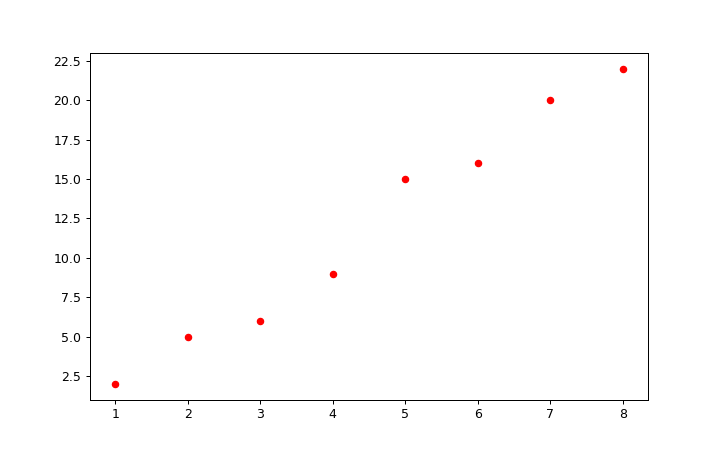

In [33]:
# Now let's plot the data!
# First create the axes object or frame for our plot
f,ax = plt.subplots(figsize=(8,5))

# now for the plot
# Note: 'ro' = red circles and markersize is the size of the circles
ax.plot(x, y, 'ro', markersize=5)

Ideally we would also like to plot the error bars (`errorVal`) of our data.  We can use the `errorbar` function to do so.

<IPython.core.display.Javascript object>


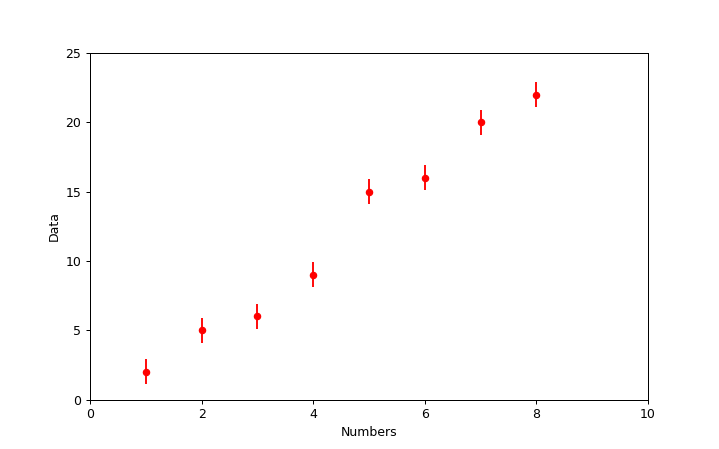

Text(0,0.5,'Data')

In [34]:
# Start by using plt.subplots again to produce the plot
f,ax = plt.subplots(figsize=(8,5))

# This time put use ax.errorbar for the 'yerr' as well.
ax.errorbar(x, y, yerr = errorVal, fmt='ro', markersize=5)

# In this case the axes range above seemed to work OK but in general you may want to control them.
# Set the axes range to be from 0 to 10 for the x-axis and 0 to 25 for the y-axis
# Replace x1 with 0, x2 with 10, y1 with 0, and y2 with 25
ax.set_xlim(0,10)
ax.set_ylim(0,25)

# Label the plot, make sure they are strings (enclosed in quotation marks)
ax.set_xlabel("Numbers")
ax.set_ylabel("Data")

### 2. Fit a line to the data.

Now let's fit a model to the data we plotted above.  Utilizing the plot it appears a (linear) line would probably be a good start.  The fitting routine we will use is part of `scipy` called `curve_fit`.

In [35]:
# Import the fitting function.
from scipy.optimize import curve_fit

# The curve_fit function requires we define our model as a function, so lets do that.

# Define the function (i.e., the model) you'll use fit to your data
# In this case it's a linear fit, so we'll use y = m x + b
def linModel(x, m, b):
    return m*x + b

In [36]:
# Notice that curve_fit returns a tuple (of arrays)
fitCoeffs, fitCovariances = curve_fit(linModel, x, y)

# Pick out the best-fit for the 'm' value and best-fit for the 'b' value
bestfit_m = fitCoeffs[0]
bestfit_b = fitCoeffs[1]

print(f'best-fit value for \'m\': {bestfit_m}')
print(f'best-fit value for \'b\': {bestfit_b}')


best-fit value for 'm': 2.9880952380995742
best-fit value for 'b': -1.5714285714341796


<IPython.core.display.Javascript object>


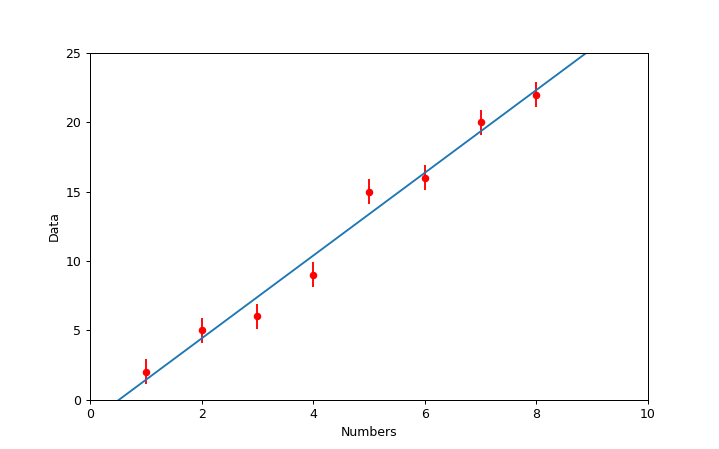

In [37]:
# Plot your data (again) as red circles with error bars
f,ax = plt.subplots(figsize=(8,5))
ax.errorbar(x, y, yerr = errorVal, fmt='ro', markersize=5)
ax.set_xlim([0, 10])
ax.set_ylim([0,25])
ax.set_xlabel("Numbers")
ax.set_ylabel("Data")

# Generate an array that will serve as x-values for the best fit line
bestfit_x = np.linspace(0,14,50) #an array from 0-13, with 50 linearly spaced points

# Define the y-values for the best-fit line, using the linModel function you defined above
bestfit_y = linModel(bestfit_x, bestfit_m, bestfit_b)

# Overplot the best-fit line in blue (default color)
ax.plot(bestfit_x, bestfit_y)

### 3. The Uncertainty in the Model Fit


You may have noticed that we ignored the second element that `curve_fit` produced.  This is the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) that tells us something about the uncertainty of the best fit values.

In [38]:
print(f'Covariance matrix:\n{fitCovariances}')

Covariance matrix:
[[ 0.03122638 -0.14051871]
 [-0.14051871  0.7962727 ]]


So which of these numbers are our errors?  It turns out the diagonals are the squares of the standard deviations of our fit parameters.  In this case we have two because we had two fit parameters.

The off-diagonal elements tell us the “covariance”, which is a measure of how the two variables vary together, or in other words, the degree to which two variable are linearly associated. 

In [39]:
# Grabbing the standard deviation or sigma for each parameter.
sigma_m = np.sqrt(fitCovariances[0,0])
sigma_b = np.sqrt(fitCovariances[1,1])

print(f'm = {bestfit_m:5.3} +/- {sigma_m:4.2}')
print(f'b = {bestfit_b:5.3} +/- {sigma_b:4.2}')

m =  2.99 +/- 0.18
b = -1.57 +/- 0.89


<IPython.core.display.Javascript object>


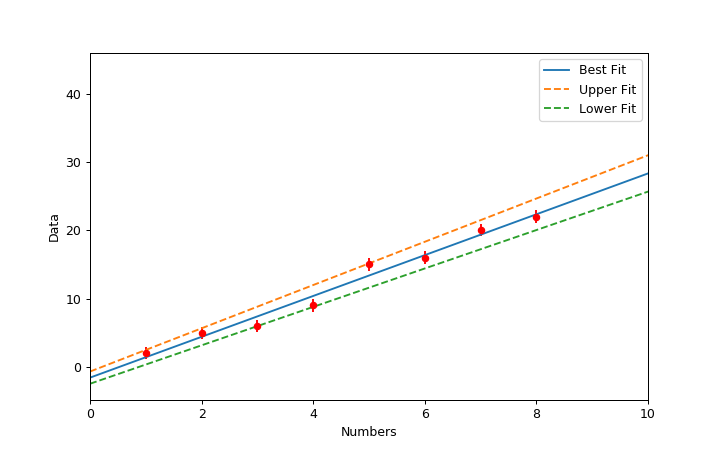

In [40]:
# For fun we can plot the data, best-fit and uncertainty together
f,ax = plt.subplots(figsize=(8,5))

# Data with red circles and error bars...
ax.errorbar(x, y, yerr = errorVal, fmt='ro', markersize=5)
ax.set_xlim([0, 10])
ax.set_xlabel("Numbers")
ax.set_ylabel("Data")

# Best-fit line in blue...
ax.plot(bestfit_x,bestfit_y, label='Best Fit')

# Get y-values for upper (and lower) best-fit line
upperfit_y = linModel(bestfit_x, bestfit_m + sigma_m, bestfit_b + sigma_b)
lowerfit_y = linModel(bestfit_x, bestfit_m - sigma_m, bestfit_b - sigma_b)

# Upper (and lower) best-fit line...
ax.plot(bestfit_x, upperfit_y, '--', label='Upper Fit')
ax.plot(bestfit_x, lowerfit_y, '--', label='Lower Fit')

# Add in a legend
ax.legend()

# That's all!  To be continued in part 2...